In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

import matplotlib
matplotlib.rcParams['figure.dpi'] = 200

In [24]:
print('Give the name of the strategies of the first player (e.g. strategy1,strategy2,..)')
x = input()
first_player_strategies = x.split(',')
print('The fist player\'s strategies are', first_player_strategies)
print()
print('Give the name of the strategies of the second player (e.g. strategy1,strategy2,..)')
y = input()
second_player_strategies = y.split(',')
print('The second player\'s strategies are', second_player_strategies)
print()
strategy_combinations = []
for first_strat in first_player_strategies:
    for second_strat in second_player_strategies:
        strategy_combinations.append(first_strat + second_strat)
print('The set of combined strategies are:', strategy_combinations)
print()
print('Give the payoffs of each strategy of the players.\n\
For example if player\'s 1 strategies are U,D and player\'s 2 strategies are L,C,R\n\
and the matrix with the corresponding payoffs is the following:\n\
   L     C     R\n\
   __    __    __\n\
  | 5|  | 6|  | 2|\n\
U |3 |  |5 |  |7 |\n\
   __    __    __\n\
  | 8|  | 3|  | 1|\n\
D |7 |  |4 |  |2 |\n\
\n\
Then the input for the first player should be --> 3 5 7 for U and 7 4 2 for D and accordingly\n\
for the second player --> 5 8 for L, 6 3 for C and 2 1 for R')
print()
print('First Player\'s payoffs')
first_player_payoffs = []
for _ in first_player_strategies:
    print('Enter payoff of strategy ' + _)
    first_payoffs = input()
    first_player_payoffs.append(first_payoffs)
print()
print('Second Player\'s payoffs')
second_player_payoffs = []
for _ in second_player_strategies:
    print('Enter payoff of strategy ' + _)
    second_payoffs = input()
    second_player_payoffs.append(second_payoffs)
    
def input_payoff_to_array(input_list):
    return [list(map(lambda u: int(u), x.split(' '))) for x in input_list]

payoff_1_matrix = np.array(input_payoff_to_array(first_player_payoffs))
payoff_2_matrix = np.array(input_payoff_to_array(second_player_payoffs))
print()
print('Player\'s 1 payoff matrix is:')
print(payoff_1_matrix)
print()
print('Player\'s 2 payoff matrix is:')
print(payoff_2_matrix.T)

Give the name of the strategies of the first player (e.g. strategy1,strategy2,..)
U,M,D
The fist player's strategies are ['U', 'M', 'D']

Give the name of the strategies of the second player (e.g. strategy1,strategy2,..)
L,C,R
The second player's strategies are ['L', 'C', 'R']

The set of combined strategies are: ['UL', 'UC', 'UR', 'ML', 'MC', 'MR', 'DL', 'DC', 'DR']

Give the payoffs of each strategy of the players.
For example if player's 1 strategies are U,D and player's 2 strategies are L,C,R
and the matrix with the corresponding payoffs is the following:
   L     C     R
   __    __    __
  | 5|  | 6|  | 2|
U |3 |  |5 |  |7 |
   __    __    __
  | 8|  | 3|  | 1|
D |7 |  |4 |  |2 |

Then the input for the first player should be --> 3 5 7 for U and 7 4 2 for D and accordingly
for the second player --> 5 8 for L, 6 3 for C and 2 1 for R

First Player's payoffs
Enter payoff of strategy U
5 6 5
Enter payoff of strategy M
4 4 6
Enter payoff of strategy D
3 3 1

Second Player's payoffs
E

In [25]:
p1_strategies = {}
for i in range(len(payoff_1_matrix)):
    p1_strategies[i] = first_player_strategies[i]
    
p2_strategies = {}
for i in range(len(payoff_2_matrix)):
    p2_strategies[i] = second_player_strategies[i]

x = payoff_1_matrix.reshape(payoff_1_matrix.size)
y = payoff_2_matrix.T.reshape(payoff_2_matrix.size)

def dom_and_dom(payoff_m, strategies_dict):
    all_strategies = []
    dominated = []
    for i in range(len(payoff_m)):
        strategy_i = []
        indices = list(range(len(payoff_m)))
        indices.remove(i)
        for j in indices:
            comparison = list(payoff_m[i] > payoff_m[j])
            strategy_i += comparison
            if False not in comparison:
                dominated.append(j)
        all_strategies.append(strategy_i)
        
    def dominant(x):
        if False in x:
            return 0
        else:
            return 1
    
    dominant_str = list(map(dominant, all_strategies))
    dominated_str = list(set(dominated))
    
    if 1 in dominant_str:
        return 'The dominant strategy is ' + p1_strategies[dominant_str.index(1)] + '.'
    else:
        message = 'No dominant strategies exist.\n'
        if len(dominated_str) > 0:
            strat = ''
            for s in dominated_str:
                strat += ' ' + strategies_dict[s]
            return message + 'The dominated strategies are:' + strat +'.'
        else:
            return message + 'Also, no dominated strategies exist'
        
print('Player 1:')
print(dom_and_dom(payoff_1_matrix, p1_strategies))
print()
print('Player 2:')
print(dom_and_dom(payoff_2_matrix, p2_strategies))

Player 1:
No dominant strategies exist.
The dominated strategies are: D.

Player 2:
No dominant strategies exist.
The dominated strategies are: L.


In [26]:
def pareto_eff(x,y):
    eff = []
    for i, (xval, yval) in enumerate(zip(x,y)):
        xvals = list(x >= xval)
        yvals = list(y >= yval)
        if sum(list(map(lambda x: x[0] & x[1], zip(xvals,yvals)))) == 1:
            eff.append(i)
    
    new_x = x[eff]
    new_y = y[eff]
    
    return new_x, new_y
                
eff_x, eff_y = pareto_eff(x, y)

def security_payoff(x,y):
    min_of_strategy_x = []
    min_of_strategy_y = []
    for i, j in zip(range(len(x)), range(len(y))):
        min_of_strategy_x.append(min(x[i]))
        min_of_strategy_y.append(min(y[i]))
    sec_pay_x = max(min_of_strategy_x)
    sec_pay_y = max(min_of_strategy_y)
    return sec_pay_x, sec_pay_y

sec_x, sec_y = security_payoff(payoff_1_matrix, payoff_2_matrix)

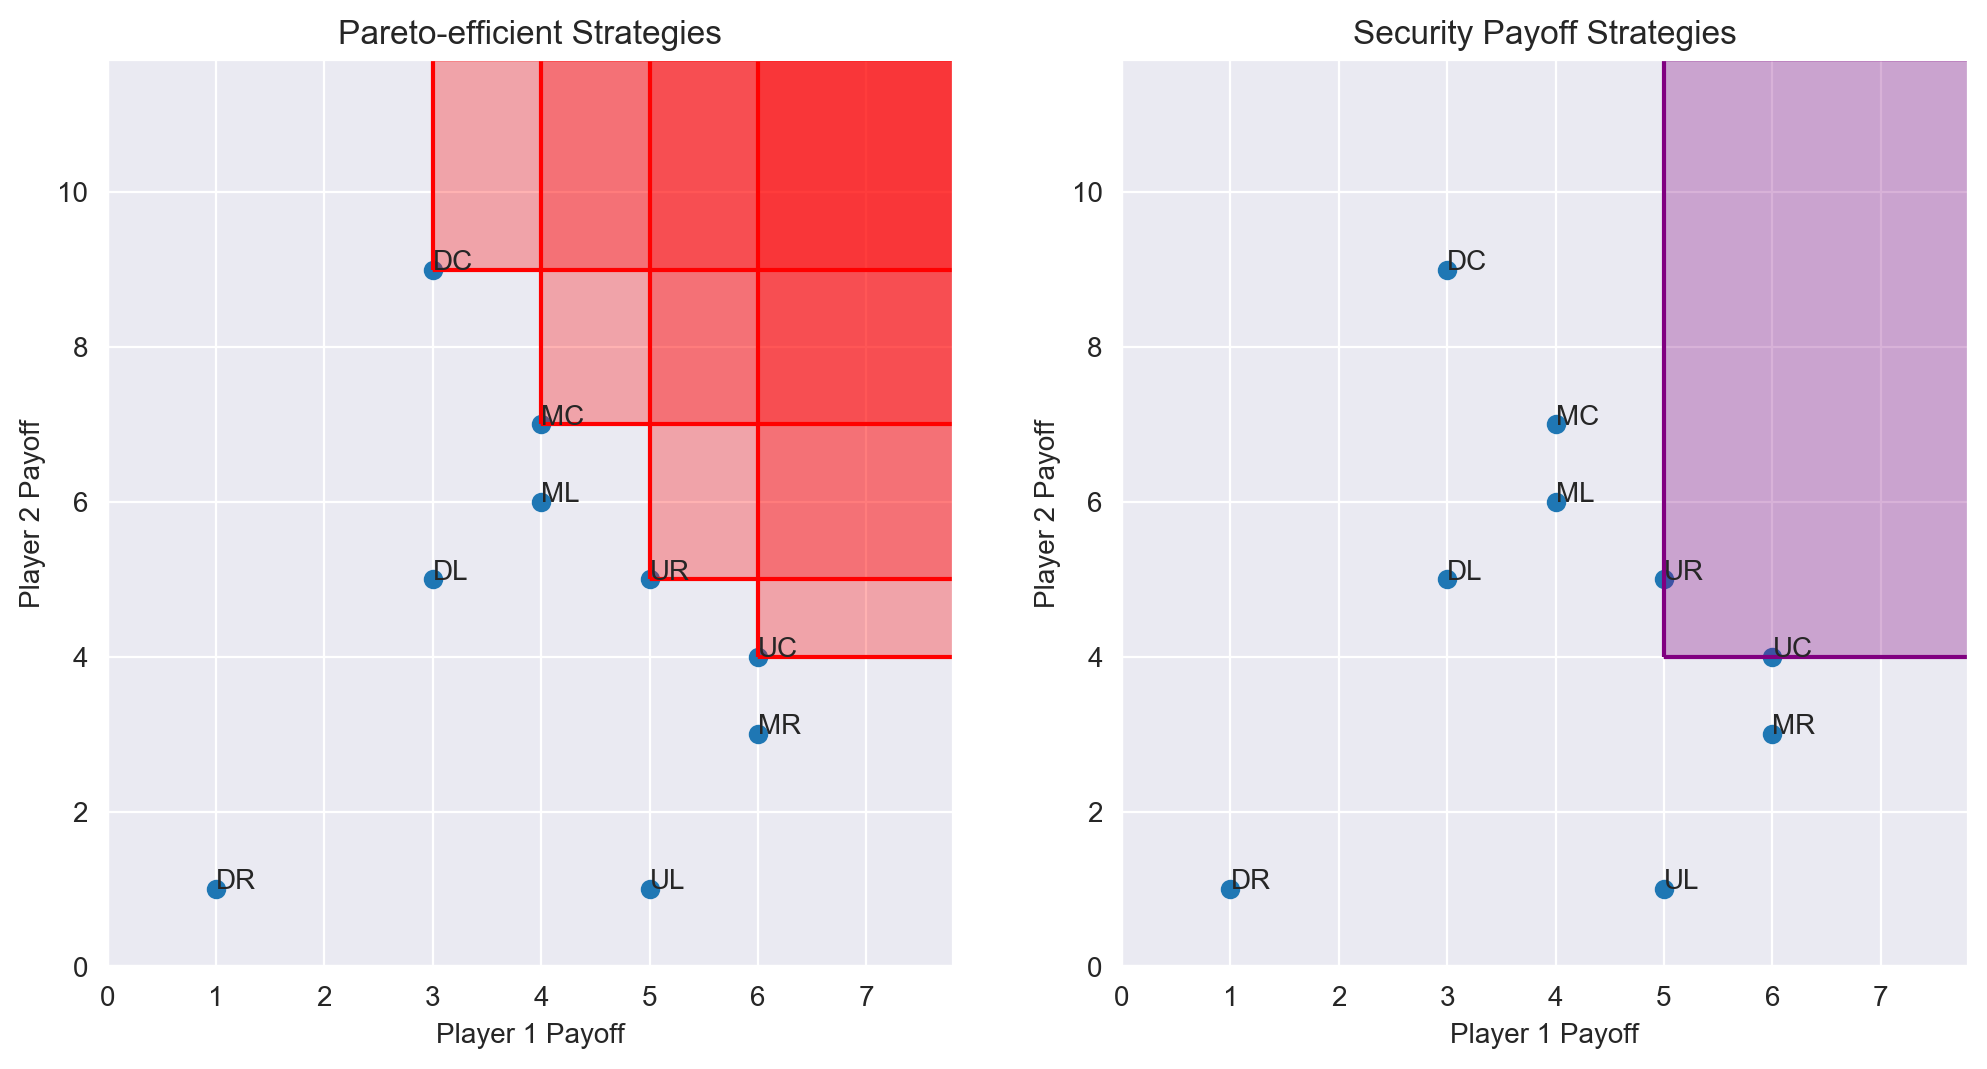

In [27]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

axes[0].scatter(x,y)
if min(x) > 0:
    axes[0].set_xlim(0,max(x) + 0.3*max(x))
else:
    axes[0].set_xlim(min(x) + 0.3*min(x),max(x) + 0.3*max(x))
if min(y) > 0:
    axes[0].set_ylim(0,max(y) + 0.3*max(y))
    miny = 0
else:
    axes[0].set_ylim(min(y) + 0.3*min(y),max(y) + 0.3*max(y))
    miny = min(y)
axes[0].set_xlabel('Player 1 Payoff')
axes[0].set_ylabel('Player 2 Payoff')
axes[0].set_title('Pareto-efficient Strategies')
for xeff, yeff in zip(eff_x, eff_y):
    axes[0].vlines(x = xeff, ymin = yeff, ymax = max(y) + 0.3*max(y), colors = 'r') #!!
    axes[0].hlines(y = yeff, xmin = xeff, xmax = max(x) + 0.3*max(x), colors = 'r') #!!
    axes[0].axvspan(xmin = xeff, xmax = max(x) + 0.3*max(x), 
                    ymin = (yeff - miny - 0.3*miny)/(max(y) + 0.3*max(y) - miny - 0.3*miny), 
                    alpha = 0.3, color = 'red') 
for i, outcome in enumerate(strategy_combinations):
    axes[0].annotate(outcome, (x[i], y[i]))
    
axes[1].scatter(x,y)
if min(x) > 0:
    axes[1].set_xlim(0,max(x) + 0.3*max(x))
else:
    axes[1].set_xlim(min(x) + 0.3*min(x),max(x) + 0.3*max(x))
if min(y) > 0:
    axes[1].set_ylim(0,max(y) + 0.3*max(y))
else:
    axes[1].set_ylim(min(y) + 0.3*min(y),max(y) + 0.3*max(y))
axes[1].set_xlabel('Player 1 Payoff')
axes[1].set_ylabel('Player 2 Payoff')
axes[1].set_title('Security Payoff Strategies')
axes[1].vlines(x = sec_x, ymin = sec_y, ymax = max(y) + 0.3*max(y), colors = 'purple') 
axes[1].hlines(y = sec_y, xmin = sec_x, xmax = max(x) + 0.3*max(x), colors = 'purple') 
axes[1].axvspan(xmin = sec_x, xmax = max(x) + 0.3*max(x), 
                ymin = (sec_y - miny - 0.3*miny) /(max(y) + 0.3*max(y) - miny - 0.3*miny), 
                alpha = 0.3, color = 'purple') 
for i, outcome in enumerate(strategy_combinations):
    axes[1].annotate(outcome, (x[i], y[i]))
    
# plt.savefig('WithoutTU_new.jpeg')

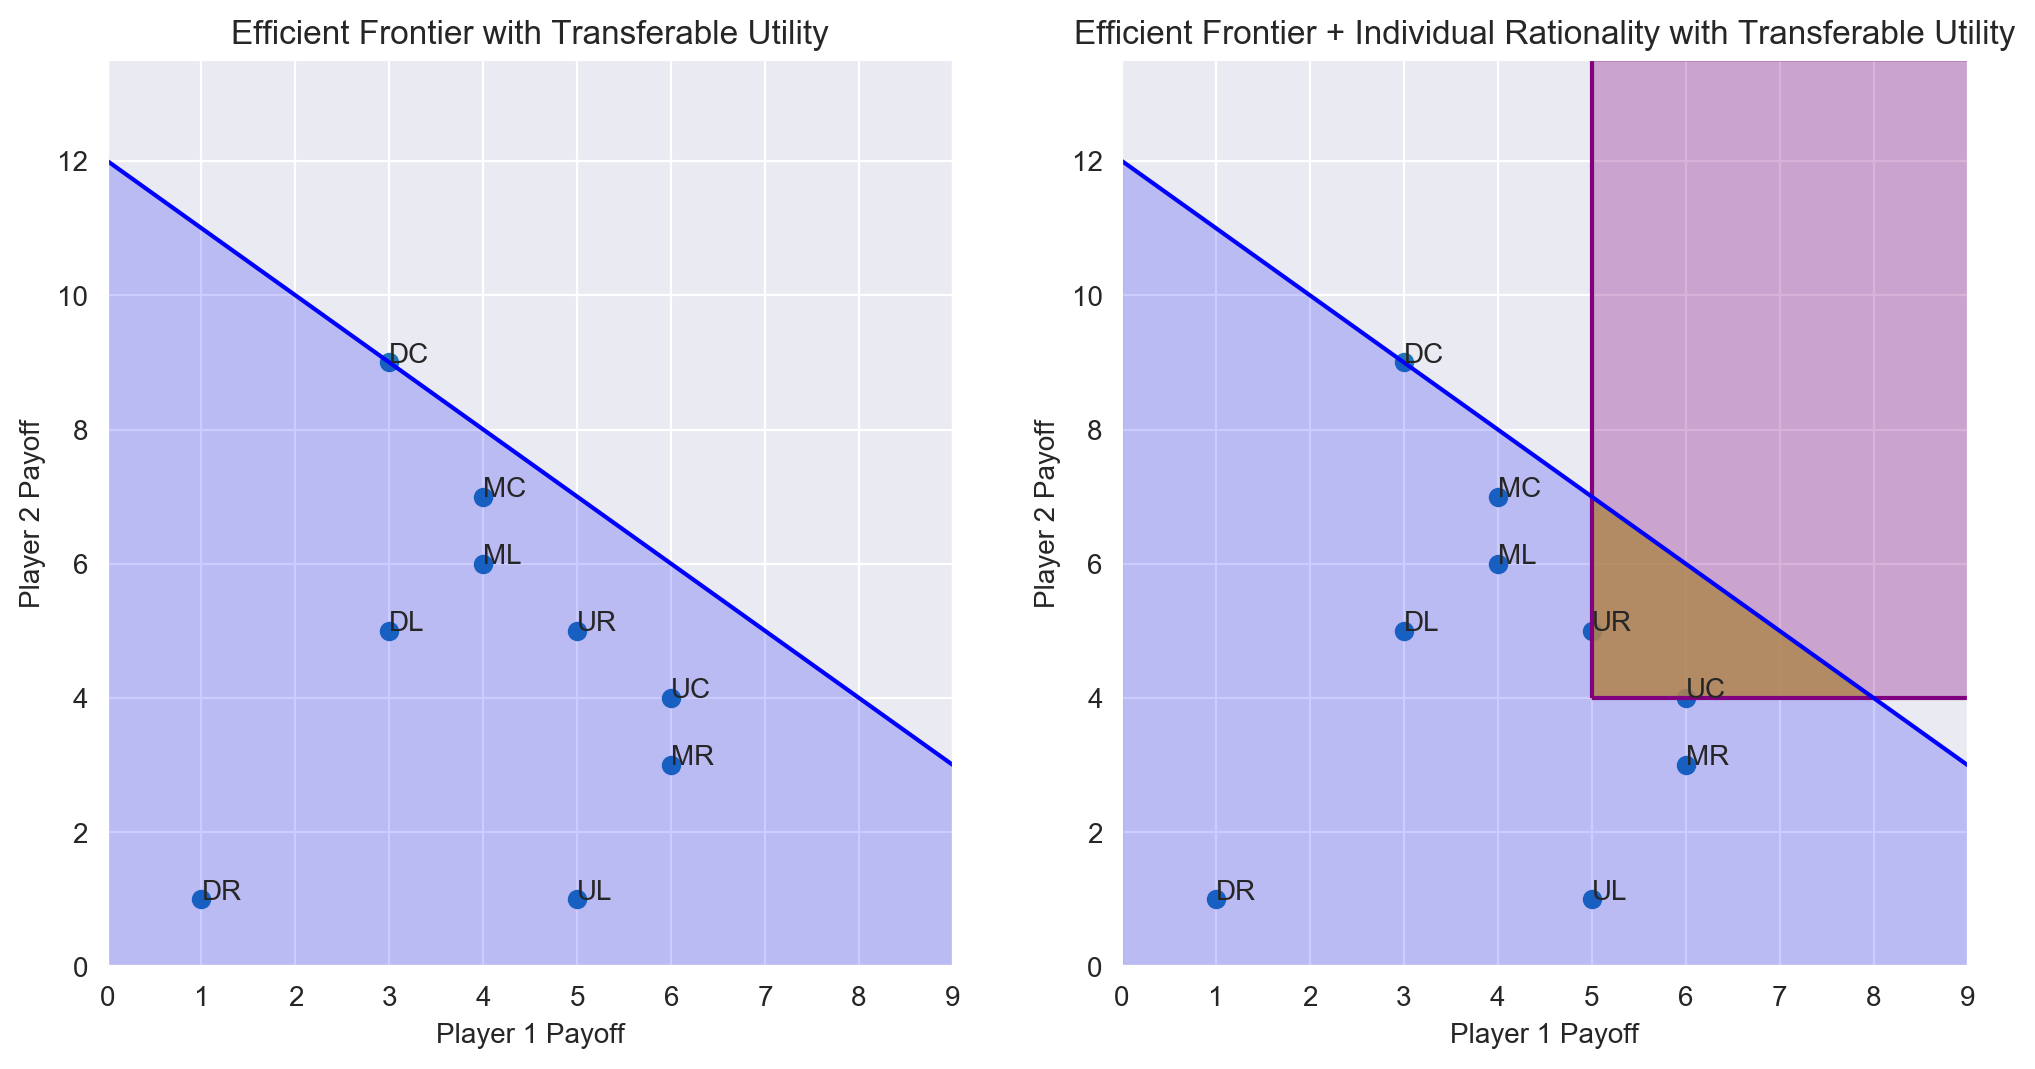

In [31]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

sum_payoff = max(x+y)

axes[0].scatter(x,y)
 
if min(x) > 0:
    axes[0].set_xlim(0,max(x) + 0.5*max(x))
    corner_x = 0
else:
    axes[0].set_xlim(min(x) + 0.5*min(x),max(x) + 0.5*max(x))
    corner_x = min(x) + 0.5*min(x)
if min(y) > 0:
    axes[0].set_ylim(0,max(y) + 0.5*max(y))
    corner_y = 0
    miny = 0
else:
    axes[0].set_ylim(min(y) + 0.5*min(y),max(y) + 0.5*max(y))
    corner_y = min(y) + 0.5*min(y)
    miny = min(y)
axes[0].plot([corner_x,-1*corner_y + sum_payoff],[-1*corner_x + sum_payoff,corner_y], color = 'blue')
axes[0].fill([corner_x,corner_x,-1*corner_y + sum_payoff],[corner_y,-1*corner_x + sum_payoff,corner_y], 
              color = 'blue', alpha = 0.2)
axes[0].set_xlabel('Player 1 Payoff')
axes[0].set_ylabel('Player 2 Payoff')
axes[0].set_title('Efficient Frontier with Transferable Utility')

for i, outcome in enumerate(strategy_combinations):
    axes[0].annotate(outcome, (x[i], y[i]))
    
axes[1].scatter(x,y)
axes[1].fill([sec_x,sec_x,-1*sec_y + sum_payoff],[sec_y,-1*sec_x + sum_payoff,sec_y], 
              color = 'yellow', alpha = 0.8)
if min(x) > 0:
    axes[1].set_xlim(0,max(x) + 0.5*max(x))
    corner_x = 0
else:
    axes[1].set_xlim(min(x) + 0.5*min(x),max(x) + 0.5*max(x))
    corner_x = min(x) + 0.5*min(x)
if min(y) > 0:
    axes[1].set_ylim(0,max(y) + 0.5*max(y))
    corner_y = 0
else:
    axes[1].set_ylim(min(y) + 0.5*min(y),max(y) + 0.5*max(y))
    corner_y = min(y) + 0.5*min(y)
axes[1].plot([corner_x,-1*corner_y + sum_payoff],[-1*corner_x + sum_payoff,corner_y], color = 'blue') 
axes[1].fill([corner_x,corner_x,-1*corner_y + sum_payoff],[corner_y,-1*corner_x + sum_payoff,corner_y], 
              color = 'blue', alpha = 0.2)
axes[1].set_xlabel('Player 1 Payoff')
axes[1].set_ylabel('Player 2 Payoff')
axes[1].set_title('Efficient Frontier + Individual Rationality with Transferable Utility')
axes[1].vlines(x = sec_x, ymin = sec_y, ymax = max(y) + 0.5*max(y), colors = 'purple') 
axes[1].hlines(y = sec_y, xmin = sec_x, xmax = max(x) + 0.5*max(x), colors = 'purple') 
axes[1].axvspan(xmin = sec_x, xmax = max(x) + 0.5*max(x), 
                ymin = (sec_y - miny - 0.5*miny) /(max(y) + 0.5*max(y) - miny - 0.5*miny), 
                alpha = 0.3, color = 'purple') 
for i, outcome in enumerate(strategy_combinations):
    axes[1].annotate(outcome, (x[i], y[i]))
    
# plt.savefig('WithTU_new.jpeg')